# Using EcoFOCIpy to apply a 35hr Lanzcos Filter to 1D data (xarray)

- input:
    -  use netcdf file
- output is currently only csv files for each depth (exported from a pandas dataframe (so you could just continue analysis)

TODO:
- output to xarray modified netcdf file

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
from erddapy import ERDDAP

import EcoFOCIpy.math.lanzcos as lanzcos 
import EcoFOCIpy.plots.TimeSeriesStickPlot as TimeseriesStickPlot

In [18]:
dataset_id = '16ckip1a_sg_0039'
ds = xa.load_dataset('/Users/bell/ecoraid/2016/Moorings/16ckip1a/erddap/initial_archive/'+dataset_id+'.unqcd.cf.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 20344, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-09-04T00:30:00 ... 2017-11-01T20:00:00
  * depth    (depth) float32 39.0
  * lat      (lat) float32 70.84
  * lon      (lon) float32 163.1
Data variables:
    T_20     (time, depth, lat, lon) float32 15.38 15.37 15.37 ... 14.7 16.64
    CS_300   (time, depth, lat, lon) float32 4.821 8.906 56.86 ... 38.92 96.14
    V_321    (time, depth, lat, lon) float32 -2.206 -8.283 -55.55 ... 38.21 74.2
    OST_62   (time, depth, lat, lon) float32 94.42 94.38 94.4 ... 92.37 92.22
    O_65     (time, depth, lat, lon) float32 295.2 295.1 295.1 ... 285.5 270.9
    U_320    (time, depth, lat, lon) float32 4.287 3.272 12.13 ... -7.411 -61.14
    CD_310   (time, depth, lat, lon) float32 117.2 158.4 167.7 ... 349.0 320.5
    P_1      (time, depth, lat, lon) float32 1e+35 1e+35 1e+35 ... 1e+35 1e+35
Attributes: (12/14)
    CREATION_DATE:        January 06, 2020 17:21 UTC
    COMPOSITE:            1
    INST_TYPE:            rcmsg
    DATA_CMNT:            sg1734.txt
    EPIC_FILE_GENERATOR:  nc_epic2udunits_time.py V0.4.0
    PROG_CMNT01:          
    ...                   ...
    MOORING:              16ckip1a
    WATER_MASS:           
    EXPERIMENT:           
    PROJECT:              
    History:              \nNovember 02, 2017 17:20 UTC Magnetic Declination ...
    featureType:

In [25]:
ds = ds.sel(time=slice('2016-09-16','2017-08-09'))

depth: <xarray.Dataset>
Dimensions:  (time: 15744, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-09-16 ... 2017-08-09T23:30:00
    depth    float32 39.0
  * lat      (lat) float32 70.84
  * lon      (lon) float32 163.1
Data variables:
    T_20     (time, lat, lon) float32 -0.379 -0.41 -0.421 ... 18.33 18.51 18.64
    CS_300   (time, lat, lon) float32 4.288 7.228 7.998 ... 60.74 32.2 20.07
    V_321    (time, lat, lon) float32 -1.236 -1.536 -2.34 ... -54.47 32.2 11.91
    OST_62   (time, lat, lon) float32 79.01 78.61 78.39 ... 91.91 91.95 91.23
    O_65     (time, lat, lon) float32 364.8 363.0 362.0 ... 270.5 269.9 267.1
    U_320    (time, lat, lon) float32 -4.106 -7.063 -7.648 ... -0.1935 16.16
    CD_310   (time, lat, lon) float32 253.2 257.7 253.0 ... 206.3 359.7 53.62
    P_1      (time, lat, lon) float32 1e+35 1e+35 1e+35 ... 1e+35 1e+35 1e+35
Attributes: (12/14)
    CREATION_DATE:        January 06, 2020 17:21 UTC
    COMPOSITE:            1
    INST_TYPE: 

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_3725/3813694522.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ufdata'][missing_index_u] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_3725/3813694522.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vfdata'][missing_index_v] = np.nan
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/Programs/EcoFOCIpy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:1

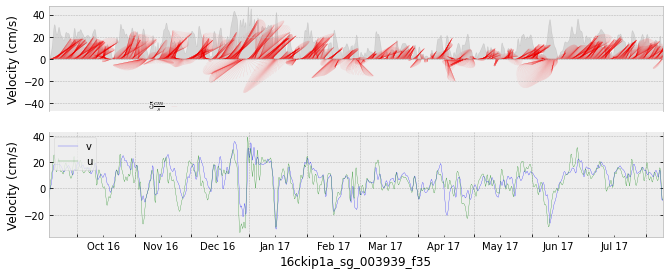

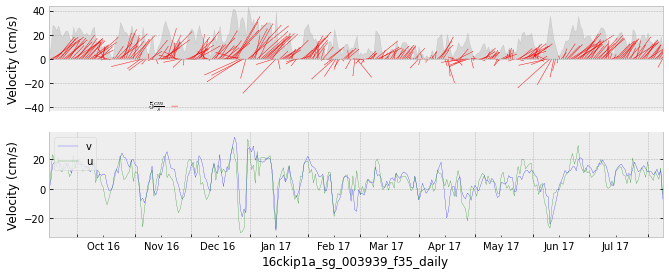

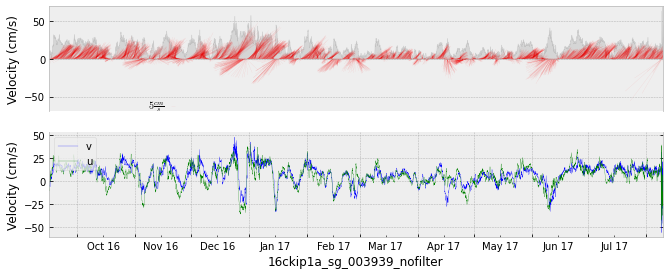

In [26]:

plotfigs = True
savedata = True
domath = True

for dd in range(ds.depth.size-1,-1,-1):
    udata, vdata = None,None
    depth_curr = ds.isel(depth=dd)
    print(f'depth: {depth_curr}, {dd}')
    ### filter
    try:
        udata = depth_curr.U_320[:,0,0].to_pandas()
        vdata = depth_curr.V_321[:,0,0].to_pandas()
    except:
        udata = depth_curr.U_320[:,0,0].to_pandas()
        vdata = depth_curr.V_321[:,0,0].to_pandas()
        
    data = pd.concat([udata, vdata], axis=1)
    data.columns = ['udata','vdata']

    data['udata'][data.udata > 1e34]=np.nan
    data['vdata'][data.vdata > 1e34]=np.nan
    data = data.resample('1H').mean()

    ## missing data fill limited by number of hours to linearly interpolate
    data['tempu'] = data['udata'].interpolate(method='time',limit=6)
    data['tempv'] = data['vdata'].interpolate(method='time',limit=6)

    # get index of missing data that wasn't filled
    # the remaining missing data will continue to be missing after analysis
    # this data and the edges of the timeseries need to have the effects of the filter window accounted for

    missing_index_u = np.isnan(data.tempu)
    missing_index_v = np.isnan(data.tempv)
    data['tempu'] = data['udata'].interpolate(method='time')
    data['tempv'] = data['vdata'].interpolate(method='time')

    #filter data with rudimentary matlab script
    data['ufdata'] = lanzcos.lanzcos(data.tempu.values,1,35)+data['udata'].mean()
    data['vfdata'] = lanzcos.lanzcos(data.tempv.values,1,35)+data['vdata'].mean()
    data['ufdata'][missing_index_u] = np.nan
    data['vfdata'][missing_index_v] = np.nan    

    #extra calculations
    if domath:
        print(dataset_id)
        print(data.describe()[['ufdata','vfdata']])

    #plot
    if plotfigs:
        try:
            p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
            plt1, fig1 = p1.plot(timedata=data.index, 
                                 udata=data.ufdata.values, 
                                 vdata=data.vfdata.values,
                                 rotate=0)
            plt1.xlabel(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35')
            fig1.savefig(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35'+'.png',dpi=600)


            #subsample
            datasub=data.resample('D').median()
            p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
            plt1, fig1 = p1.plot(timedata=datasub.index, 
                                 udata=datasub.ufdata.values, 
                                 vdata=datasub.vfdata.values,
                                 linescale=10,
                                 rotate=0)
            plt1.xlabel(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35_daily')
            fig1.savefig(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_f35_daily'+'.png',dpi=600)

            p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
            plt1, fig1 = p1.plot(timedata=data.index, 
                                 udata=data.udata.values, 
                                 vdata=data.vdata.values,
                                 rotate=0)
            plt1.xlabel(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_nofilter')
            fig1.savefig(dataset_id+str(int(ds.depth[dd].values)).zfill(2)+'_nofilter'+'.png',dpi=600)
        except:
            pass
    #save data
    if savedata:
        data[['ufdata','vfdata']].to_csv(dataset_id+'_'+str(int(ds.depth[dd].values)).zfill(2)+'_f35'+'.csv')